# SVM MNIST

## Import libraries

In [12]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

## Load MNIST Dataset and split it

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



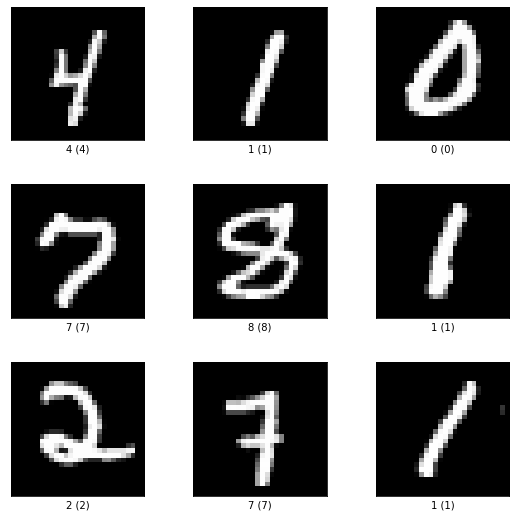

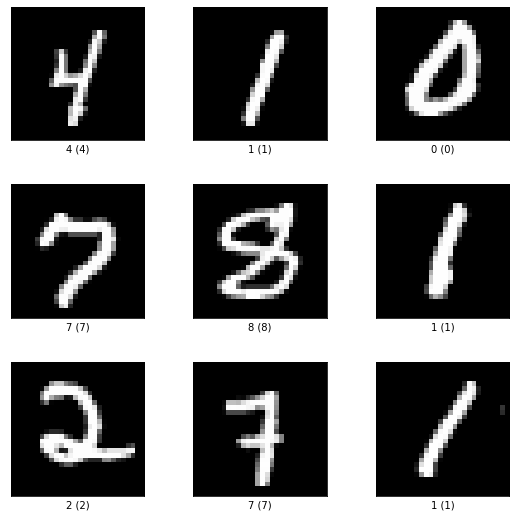

In [5]:
# Load full size of MNIST
MNIST_full, MNIST_info = tfds.load(
    'mnist',
    split='train+test',
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)
print(MNIST_info)

tfds.show_examples(MNIST_full, MNIST_info)

In [6]:
# Dataset size of MNIST
mnist_dataset_size = float( tf.data.experimental.cardinality(MNIST_full) )
print('Full dataset size of MNIST:', mnist_dataset_size)

Full dataset size of MNIST: 70000.0


In [7]:
# Split full dataset into train:test = 80:20
train_test_split = 0.8

mnist_train_size = round(mnist_dataset_size * train_test_split)
mnist_test_size = round(mnist_dataset_size - mnist_train_size)


MNIST_train = MNIST_full.take(mnist_train_size)
print('Size of Train_set:', mnist_train_size)

MNIST_test = MNIST_full.skip(mnist_train_size)
print('Size of Test_set:', mnist_test_size)

Size of Train_set: 56000
Size of Test_set: 14000


## Prepare x,y

In [8]:
x_train = []
x_test = []
y_train = []
y_test = []

for images, labels in MNIST_train:
  x_train.append(images.numpy())
  y_train.append(labels.numpy())

for images, labels in MNIST_test:
  x_test.append(images.numpy())
  y_test.append(labels.numpy())

# Normalize pixel values to 0 ~ 1
x_train, x_test = x_train / np.asarray(255.0), x_test / np.asarray(255.0)

print('shape of train_images:', np.shape(x_train))
print('shape of train_labels:', np.shape(y_train))

print('shape of test_images:', np.shape(x_test))
print('shape of test_labels:', np.shape(y_test))

shape of train_images: (56000, 28, 28, 1)
shape of train_labels: (56000,)
shape of test_images: (14000, 28, 28, 1)
shape of test_labels: (14000,)


In [9]:
# Reshape data from 56000*28*28 to 56000*764
x_train = np.reshape(x_train ,(56000, 784))
x_test = np.reshape(x_test, (14000, 784))

print('shape of train_images:', np.shape(x_train))
print('shape of train_labels:', np.shape(y_train))

print('shape of test_images:', np.shape(x_test))
print('shape of test_labels:', np.shape(y_test))

shape of train_images: (56000, 784)
shape of train_labels: (56000,)
shape of test_images: (14000, 784)
shape of test_labels: (14000,)


## SVM Model for MNIST

### Linear SVM

In [10]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(x_train, y_train)

y_pred = model_linear.predict(x_test)

In [14]:
# confusion matrix and accuracy

print("accuracy:", accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

print(confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9335 

[[1302    0   10    5    2    6   11    0    7    2]
 [   1 1550    7    3    1    3    0    4    9    2]
 [   5   14 1297   16   14    4   12   17   13    1]
 [   8    5   28 1346    2   35    1   10   20   12]
 [   7    7   18    3 1289    1    4    6    1   33]
 [  15    5   13   41   11 1114   11    1   16    9]
 [  12    2   16    2   12   20 1327    0    1    0]
 [   5    4   18    9   12    3    1 1403    2   26]
 [  12   19   20   47   10   31    9    7 1199   10]
 [   6   10   10   16   39    5    0   36    7 1242]]


### Non-linear SVM

In [15]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

non_linear_model = SVC(kernel='rbf')

non_linear_model.fit(x_train, y_train)

y_pred = non_linear_model.predict(x_test)

In [16]:
# confusion matrix and accuracy

print("accuracy:", accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

print(confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9782142857142857 

[[1326    1    0    0    1    2    5    0    7    3]
 [   1 1563    6    2    1    0    0    4    1    2]
 [   2    5 1357    2    5    0    4   10    7    1]
 [   0    1   11 1420    0   10    0    7   15    3]
 [   2    3    2    0 1344    0    3    2    0   13]
 [   4    0    2    9    8 1203    8    0    1    1]
 [   3    1    0    0    3    7 1378    0    0    0]
 [   1    3    5    1    6    0    0 1460    1    6]
 [   2    8    3    9    8    5    2    3 1317    7]
 [   2    2    2    6   16    2    0   12    2 1327]]


# SVM KMNIST

## Load KMNIST Dataset and split it

Shuffling and writing examples to /root/tensorflow_datasets/kmnist/3.0.1.incomplete5QK1VC/kmnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/kmnist/3.0.1.incomplete5QK1VC/kmnist-test.tfrecord


Dataset kmnist downloaded and prepared to /root/tensorflow_datasets/kmnist/3.0.1. Subsequent calls will reuse this data.


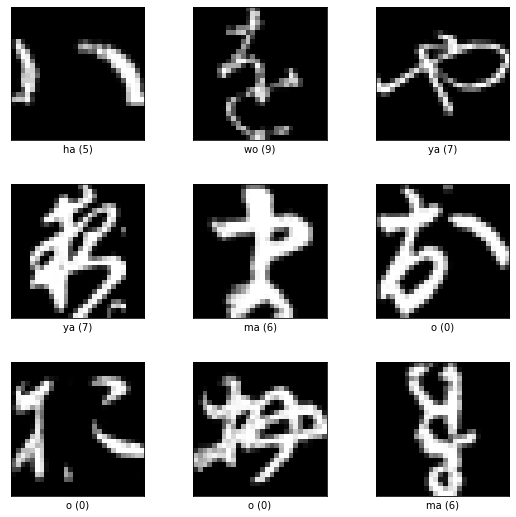

Full dataset size of KMNIST: 70000.0
Size of Train_set: 56000
Size of Test_set: 14000


In [17]:
# Load full size of MNIST
KMNIST_full, KMNIST_info = tfds.load(
    'kmnist',
    split='train+test',
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)
tfds.show_examples(KMNIST_full, KMNIST_info)


# Print dataset size of MNIST
kmnist_dataset_size = float( tf.data.experimental.cardinality(KMNIST_full) )
print('Full dataset size of KMNIST:', kmnist_dataset_size)

# Split full dataset into train:test = 80:20
train_test_split = 0.8

kmnist_train_size = round(kmnist_dataset_size * train_test_split)
kmnist_test_size = round(kmnist_dataset_size - kmnist_train_size)

KMNIST_train = KMNIST_full.take(kmnist_train_size)
print('Size of Train_set:', kmnist_train_size)

KMNIST_test = KMNIST_full.skip(kmnist_train_size)
print('Size of Test_set:', kmnist_test_size)

## Prepare x,y

In [18]:
x_train = []
x_test = []
y_train = []
y_test = []
for images, labels in KMNIST_train:
  x_train.append(images.numpy())
  y_train.append(labels.numpy())

for images, labels in KMNIST_test:
  x_test.append(images.numpy())
  y_test.append(labels.numpy())

In [19]:
# Normalize pixel values to 0 ~ 1
x_train, x_test = x_train / np.asarray(255.0), x_test / np.asarray(255.0)

print('shape of train_images:', np.shape(x_train))
print('shape of train_labels:', np.shape(y_train))

print('shape of test_images:', np.shape(x_test))
print('shape of test_labels:', np.shape(y_test))

shape of train_images: (56000, 28, 28, 1)
shape of train_labels: (56000,)
shape of test_images: (14000, 28, 28, 1)
shape of test_labels: (14000,)


In [20]:
# Reshape data from 56000*28*28 to 56000*764
x_train = np.reshape(x_train ,(56000, 784))
x_test = np.reshape(x_test, (14000, 784))

In [21]:
print('shape of train_images:', np.shape(x_train))
print('shape of train_labels:', np.shape(y_train))

print('shape of test_images:', np.shape(x_test))
print('shape of test_labels:', np.shape(y_test))

shape of train_images: (56000, 784)
shape of train_labels: (56000,)
shape of test_images: (14000, 784)
shape of test_labels: (14000,)


## SVM Model for KMNIST

### Linear SVM

In [22]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(x_train, y_train)

y_pred = model_linear.predict(x_test)

In [23]:
# confusion matrix and accuracy

print("accuracy:", accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

print(confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.8439285714285715 

[[1248    2    1    7   34   11    0   30   11   14]
 [  14 1202   35   15   40   17   41    6   29   40]
 [   0   39 1087   34   21   23   93    4   52   33]
 [   8   16   28 1290   21   41    9   12   26    4]
 [  62   52   47   17 1061    7   23   24   13   26]
 [  21   19   32   54   14 1239    5    7   15    5]
 [   5   64   84    9   31   21 1189   18   16    5]
 [  24    8   30   22   38   38   12 1259    4   12]
 [  28   67   57   22   13   23   46    2 1107    5]
 [  14   65   60    3   34   11    7   18   15 1133]]


### Non-linear SVM

In [24]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

non_linear_model = SVC(kernel='rbf')

non_linear_model.fit(x_train, y_train)

y_pred = non_linear_model.predict(x_test)

In [25]:
# confusion matrix and accuracy

print("accuracy:", accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

print(confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9641428571428572 

[[1325    3    0    0   12    4    1    9    1    3]
 [   4 1380    6    1    9    2   17    2    3   15]
 [   0    2 1297    8   10    5   43    3   12    6]
 [   2    2   15 1414    4    4    6    2    4    2]
 [  11   11    5    2 1279    1    9    3    8    3]
 [   2   10   13   15    3 1359    3    2    4    0]
 [   1    9   20    5   11    5 1372   11    6    2]
 [   4    6    0    3    9    0    2 1420    1    2]
 [   6    9    4    5    1    3   10    2 1330    0]
 [   5    9    9    0   10    2    0    0    3 1322]]
